# Programming Exercise 4: Neural Networks Learning

> In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition.

## 1. Neural Networks

### 1.1 Visualizing the data

> There are 5000 training examples in ex4data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location.

Loading the dataset:

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat('data/ex4data1.mat')

Visualizing the data:

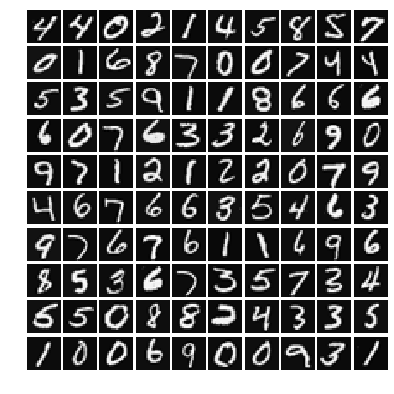

In [2]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(5000, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(mat['X'][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

### 1.2 Model representation

<img src="neural_network.png">

* $a_i^{(j)}$ = activation of unit $i$ in layer $j$

* $\Theta^{(j)}$ = matrix of weights controlling function mapping from layer $j$ to layer $j+1$. It's dimension is $s_{j+1}\times(s_j+1)$ where $s_j$ is the number of units in layer $j$ and $s_{j+1}$ is the number of units in layer $j+1$.

* $z^{(j+1)} = \Theta^{(j)}a^{(j)}$

* $h_\Theta(x) = a^{(j+1)} = g(z^{(j+1)}) $



Our neural network has:
* $3$ layers: an input layer, a hidden layer and an output layer
* $400$ input layer units (because the images are of size $20 \times 20$
* $25$ units in the second layer
* $10$ output units (corresponding to the 10 digit classes)
* $\Theta^{(1)}$ and $\Theta^{(2)}$ are provided
    * $\Theta^{(1)}$ has dimension $25 \times 401$
    * $\Theta^{(2)}$ has dimension $10 \times 26$


In [3]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [4]:
mat_weights = scipy.io.loadmat('data/ex4weights.mat')
mat_weights['Theta1'].shape, mat_weights['Theta2'].shape

((25, 401), (10, 26))

Unroll parameters:

In [5]:
nn_params = np.hstack((mat_weights['Theta1'].ravel(order='F'), 
                       mat_weights['Theta2'].ravel(order='F')))

### 1.3 Feedforward and cost function

Cost function without regularization

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K [-y_k^{(i)} log((h_\theta(x^{(i)}))_k) - (1-y_k^{(i)})log(1-(h_\theta(x^{(i)}))_k)]$$

In [6]:
import numpy as np
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [7]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T))
        J = J + (j/m)
    return J

In [8]:
J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'])
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.287629)'.format(J))

Cost at parameters (loaded from ex4weights): [ 0.28762917] 
(this value should be about 0.287629)


### 1.4 Regularized cost function

Cost function with regularization for neural network of the example:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K [-y_k^{(i)} log((h_\theta(x^{(i)}))_k) - (1-y_k^{(i)})log(1-(h_\theta(x^{(i)}))_k)] + \frac{\lambda}{2m}[\sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2] $$

In [9]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    return J

In [10]:
lambda_r = 1

J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.383770)'.format(J))

Cost at parameters (loaded from ex4weights): [ 0.38376986] 
(this value should be about 0.383770)


## 2. Backpropagation

> In this part of the exercise, you will implement the backpropagation algorithm to compute the gradient for the neural network cost function.

### 2.1 Sigmoid gradient

$$g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z))$$ 

where $g(z) = sigmoid(z) = \frac{1}{1+e^{-z}}$ 

In [11]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1-sigmoid(z))

### 2.2 Random initialization
> When training neural networks, it is important to randomly initialize the pa- rameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $[−\epsilon_{init}, \epsilon_{init}]$. You should use $\epsilon_{init} = 0.12$.

In [12]:
epsilon_init = 0.12
initial_theta1 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(hidden_layer_size, input_layer_size+1))
initial_theta2 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(num_labels, hidden_layer_size+1))

### 2.3 Backpropagation

> Given a training example $(x^{(t)},y^{(t)})$, we will first run a "forward pass" to compute all the activations throughout the network, including the output value of the hypothesis $h_\Theta(x)$. Then, for each node $j$ in layer $l$, we would like to compute an "error term" $\delta_j^{(l)}$ that measures how much that node was "responsible" for any errors in our output.

<img src="backpropagation.png">

Algorithm:

1) Set the input layer's values $(a^{(1)})$ to the t-th training example $x^{(t)}$.
Perform a feedforward pass, computing the activations ($z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)}$) for layers 2 and 3.

2) For each output unit $k$ in layer $3$ (the output layer), set 

$$ \delta_k^{(3)} = (a_k^{(3)} - y_k)$$

3) For the hidden layer $l = 2$, set

$$ \delta_k^{(2)} = (\Theta^{(2)})^T \delta^{(3)} .* g'(z^{(2)})$$ 

4) Accumulate the gradient from this example using the following formula. Note that you should skip or remove $\delta_0^{(2)}$

$$ \Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$$

5) Obtain the (unregularized) gradient for the neural network cost func-
tion by dividing the accumulated gradients by $\frac{1}{m}$:

$$ D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}$$

In [13]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    capital_delta1 = np.zeros(theta1.shape)
    capital_delta2 = np.zeros(theta2.shape)
    
    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
        delta3 = a3 - yk.T
        
        z2 = np.hstack([1, z2])
        delta2 = theta2.T.dot(delta3.T) * (sigmoid_gradient(z2).reshape(-1,1))
        
        capital_delta1 = capital_delta1 + (delta2[1:,:].dot(a1.reshape(1,-1)))
        capital_delta2 = capital_delta2 + (delta3.T.dot(a2.reshape(1,-1)))
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    
    theta1_grad = (1/m) * (capital_delta1 + lambda_r * theta1) #with regularization
    theta1_grad[:,0] = ((1/m) * capital_delta1)[:,0]
    
    theta2_grad = (1/m) * (capital_delta2 + lambda_r * theta2) #with regularization
    theta2_grad[:,0] = ((1/m) * capital_delta2)[:,0]
    
    grad = np.hstack((theta1_grad.ravel(order='F'), theta2_grad.ravel(order='F')))
    return J, grad

### 2.4 Gradient Checking

> In your neural network, you are minimizing the cost function $J(\Theta)$. To perform gradient checking on your parameters, you can imagine “unrolling” the parameters $\Theta^{(1)}, \Theta^{(2)}$ into a long vector $\theta$. By doing so, you can think of the cost function being $J(\theta)$ instead and use the following gradient checking procedure. Suppose you have a function $f_i(\theta)$ that purportedly computes $\frac{\partial}{\partial \theta_i} J(\theta)$; you’d like to check if $f_i$ is outputting correct derivative values. If $\theta^{(i+)}$ is the same $\theta$, except its i-th element has been incremented by $\epsilon$. You can now numerically verify $f_i(\theta)$’s correctness by checking, for each $i$, that: $f_i(\theta) 	\approx \frac{J(\theta^{(i+)} - J(\theta^{(i-)}}{2\epsilon}$. The degree to which these two values should approximate each other will depend on the details of $J$. But assuming $\epsilon = 10^{−4}$, you’ll usually find that the left- and right-hand sides of the above will agree to at least 4 significant digits (and often many more).

In [14]:
def compute_numerical_gradient(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    e = 0.0001
    num_grad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    for p in range(len(theta)):
        perturb[p] = e
        loss1, _ = nn_cost_function(theta-perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        loss2, _ = nn_cost_function(theta+perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        num_grad[p] = (loss2-loss1)/(2*e)
        perturb[p] = 0
    return num_grad

In [15]:
def debug_initialize_weights(fan_out, fan_in):
    W = np.zeros((fan_out, 1+fan_in))
    W = np.reshape(range(len(W.ravel(order='F'))), W.shape)/10
    return W

In [16]:
def check_nn_gradients(lambda_r=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    theta1 = debug_initialize_weights(hidden_layer_size, input_layer_size)
    theta2 = debug_initialize_weights(num_labels, hidden_layer_size)
    
    X = debug_initialize_weights(m, input_layer_size-1)
    y = 1 + np.mod(range(m), num_labels).reshape(-1, 1)
    
    nn_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F')))
    
    cost, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    num_grad = compute_numerical_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    
    print('The columns should be very similar...')
    for i, j in zip(num_grad, grad):
        print(i,j)
        
    diff = np.linalg.norm(num_grad-grad)/np.linalg.norm(num_grad+grad)
    if diff < 0.000000010:
        print('\nBackpropagation is correct')
    else:
        print('\nBackpropagation is incorrect')

In [17]:
check_nn_gradients()

The columns should be very similar...
0.350810279111 0.350810278248
0.235352218816 0.235352218829
0.145297910761 0.145297911142
0.0931519991454 0.0931519992319
0.0603206957006 0.0603206959969
0.193739801544 0.193739801851
0.0873538309687 0.0873538307836
0.0297739735089 0.029773974437
0.0105903644609 0.0105903645745
0.00404766653972 0.0040476658802
0.228820831349 0.228820829676
0.110889052669 0.110889052667
0.0443037659892 0.0443037655512
0.0199055643968 0.0199055644977
0.0100797357039 0.0100797354799
0.263901857176 0.2639018575
0.134424273925 0.134424274549
0.0588335566487 0.0588335566654
0.0292207642172 0.0292207644209
0.0161118053743 0.0161118050796
0.396222246097 0.396222246265
0.588733996851 0.58873399685
0.799466367374 0.799466367039
0.249842282916 0.249842282957
0.349065613472 0.349065613487
0.484656985673 0.484656985951
0.343211700198 0.343211700294
0.469290171488 0.469290171492
0.648764112379 0.648764112678
0.380299384979 0.380299385093
0.526333519888 0.526333519887
0.720856438

In [18]:
lambda_r = 3
check_nn_gradients(lambda_r)
J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.576051)'.format(J))

The columns should be very similar...
0.350810279119 0.350810278248
0.235352218816 0.235352218829
0.145297910752 0.145297911142
0.0931519991454 0.0931519992319
0.0603206956917 0.0603206959969
0.253739801543 0.253739801851
0.387353830966 0.387353830784
0.569773973496 0.569773974437
0.790590364446 0.790590364574
1.02404766654 1.02404766588
0.348820831348 0.348820829676
0.470889052675 0.470889052667
0.644303766002 0.644303765551
0.85990556439 0.859905564498
1.09007973572 1.09007973548
0.443901857174 0.4439018575
0.55442427394 0.554424274549
0.718833556643 0.718833556665
0.92922076421 0.929220764421
1.15611180538 1.15611180508
0.396222246088 0.396222246265
0.58873399686 0.58873399685
0.799466367383 0.799466367039
0.309842282924 0.309842282957
0.769065613486 0.769065613487
1.26465698566 1.26465698595
0.463211700197 0.463211700294
0.949290171484 0.949290171492
1.48876411238 1.48876411268
0.560299384986 0.560299385093
1.06633351988 1.06633351989
1.62085643851 1.62085643836
0.63302778706 0.633

### 2.5 Learning Parameters - Training the Neural Network

In [32]:
import scipy.optimize as opt
lambda_r = 1
opt_results = opt.minimize(nn_cost_function, nn_params, args=(input_layer_size, 
                                                              hidden_layer_size, 
                                                              num_labels, 
                                                              mat['X'], 
                                                              mat['y'], 
                                                              lambda_r), 
                            method='L-BFGS-B', jac=True, options={'maxiter':50})

In [34]:
opt_results

      fun: array([ 0.31722116])
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.31088680e-04,  -9.15347261e-05,  -6.81873625e-05, ...,
        -4.79810736e-05,  -2.89538852e-05,   2.21663569e-05])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 55
      nit: 50
   status: 1
  success: False
        x: array([-0.06388654, -0.13010792,  0.50133758, ..., -2.95836945,
       -2.87425683, -1.74870182])

In [35]:
theta1 = np.reshape(opt_results['x'][:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
theta2 = np.reshape(opt_results['x'][hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')    

In [36]:
def predict_nn(theta1, theta2, X):
    m, n = X.shape
    a1 = np.hstack((np.ones((m,1)),X)) #with a0
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.hstack((np.ones((m,1)),a2)).dot(theta2.T) #with a0
    a3 = sigmoid(z3)
    h = np.argmax(a3, axis=1)+1 #get label with largest h(x)
    
    return h

In [37]:
y_pred = predict_nn(theta1, theta2, mat['X'])
accuracy = np.mean(y_pred == mat['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 99.24'

#### 2.5.1 Similar Code using Scikit-Learn:

In [30]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='logistic', solver='lbfgs', alpha=1, max_iter=50)
nn.fit(mat['X'], mat['y'].T[0])

MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
nn.score(mat['X'], mat['y'].T[0])

0.98040000000000005

## 3. Visualizing the hidden layer

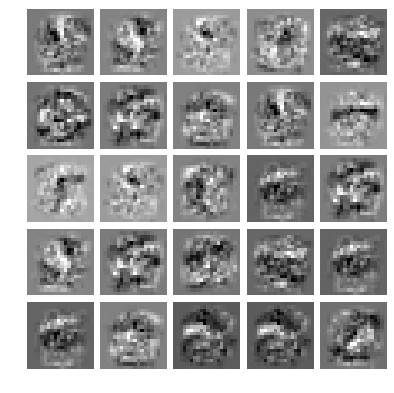

In [26]:
rows = 5
cols = 5
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(25, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(theta1[:,1:][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

### 3.1 Trying Different Learning Settings

> Neural networks are very powerful models that can form highly complex decision boundaries. Without regularization, it is possible for a neural network to “overfit” a training set so that it obtains close to 100% accuracy on the training set but does not as well on new examples that it has not seen before.

In [27]:
%%time
lambda_r = 0.1
opt_results = opt.minimize(nn_cost_function, nn_params, args=(input_layer_size, hidden_layer_size, num_labels, 
                                                              mat['X'], mat['y'], lambda_r), 
                            method='TNC', jac=True, options={'maxiter':100})
theta1 = np.reshape(opt_results['x'][:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
theta2 = np.reshape(opt_results['x'][hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')   
y_pred = predict_nn(theta1, theta2, mat['X'])
accuracy = np.mean(y_pred == mat['y'].T)

CPU times: user 57 s, sys: 994 ms, total: 58 s
Wall time: 58.1 s


In [28]:
f'Train accuracy with lambda={lambda_r} and maxiter=50: {accuracy * 100}'

'Train accuracy with lambda=0.1 and maxiter=50: 99.98'

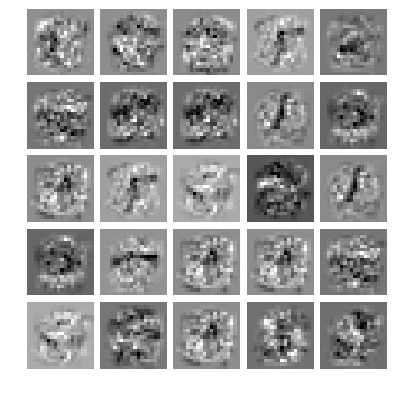

In [29]:
rows = 5
cols = 5
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(25, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(theta1[:,1:][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()